In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas
import numpy

# Input data

In [2]:
data = pandas.read_csv('input.csv', index_col=False)

data.head()

,event,particle,hit,x,y
0,0,10000050,100000100,-582.140676,813.136874
1,0,10000050,100000270,-1164.253919,1626.244599
2,0,10000050,100000030,-1746.367161,2439.352325
3,0,10000050,100001620,-2328.480404,3252.460050
4,0,10000050,100000550,-2910.593646,4065.567775


# Track Regression

Consider a track pattern recognition method using the Hough Tramsform in polar system. In this system a circular track can be parametrized as follow:

$$
r = 2r_{0}Cos(\phi - \theta)
$$

where:
* $r$ and $\phi$ : are coordinates of a hit in the polar system.
* $r_{0}$ and $\theta$ : are coordinates of a center of a circular track in the polar system.

A linear track corresponds to the $r_{0} = \infty$.

Transformation of cartesian coordinates of a hit to polar coordinates defined as:

$$
\phi = arctan(\frac{y}{x})
$$
$$
r = \sqrt{x^{2} + y^{2}}
$$


The Track Regression model fits the following model:

$$
r = 2r_{0} Cos(\theta) Sin (\phi) + 2r_{0} Sin(\theta) Sin(\phi)
$$

## Select one track

In [3]:
toy_event_id = 0
event = data[data.event.values == toy_event_id]
track = event[event.particle.values == numpy.unique(event.particle.values)[0]]
track

,event,particle,hit,x,y
24,0,10000000,100001250,-572.125214,-820.166288
25,0,10000000,100000080,-1060.473423,-1695.699301
26,0,10000000,100001380,-1460.375365,-2620.554100
27,0,10000000,100000780,-1767.032265,-3588.536885
28,0,10000000,100000500,-1975.456027,-4593.209497
29,0,10000000,100000610,-2080.389423,-5627.786408
30,0,10000000,100000310,-2076.209258,-6685.009732
31,0,10000000,100001920,-1956.804180,-7756.991518


## Track Regression Example

In [4]:
from regression import TrackRegression

tr = TrackRegression()
tr.fit(track.x.values, track.y.values)
x_pred, y_pred = tr.predict(numpy.linspace(-4, 4, 1000001))

print tr.theta_, tr.invr_

-0.659175386315 0.000100126605738


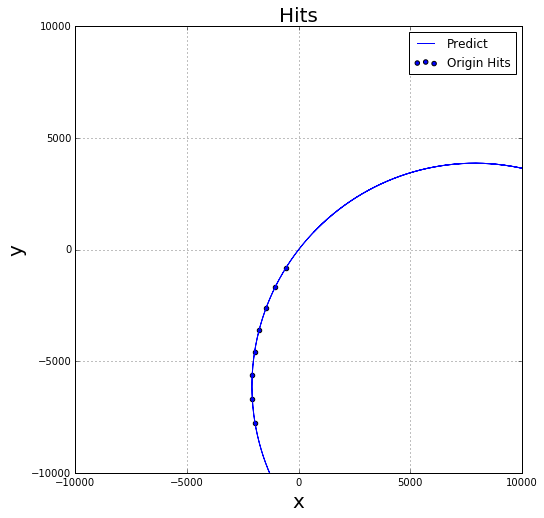

In [10]:
plt.figure(figsize=(8,8))

plt.scatter(track.x.values, track.y.values, label='Origin Hits')
plt.plot(x_pred, y_pred, label='Predict')

plt.title("Hits", size=20)
plt.xlim(-10000, 10000)
plt.ylim(-10000, 10000)
plt.grid(b=1)
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)
plt.legend(loc='best')
plt.show()